In [1]:
# Wine Quality ML Algorithm, following example from freeCodeCamp

This notebook will explore how to predict wine quality with ML algorithms. We'll use the dataset provided by UCI titled "Wine Quality".

In [2]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
wine_quality = fetch_ucirepo(id=186) 
  
# data (as pandas dataframes) 
X = wine_quality.data.features 
y = wine_quality.data.targets

data = wine_quality.data.original

In [3]:
# Just going to import some of the packages that were in my iris notebook
from scipy import *
from numpy import *
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import sklearn
import seaborn as sns

# What are we looking at?

This dataset is collected under X, lets have a look at the properties!

In [4]:
X.describe()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  \
count    6497.000000       6497.000000  6497.000000     6497.000000   
mean        7.215307          0.339666     0.318633        5.443235   
std         1.296434          0.164636     0.145318        4.757804   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        3.000000   
75%         7.700000          0.400000     0.390000        8.100000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free_sulfur_dioxide  total_sulfur_dioxide      density  \
count  6497.000000          6497.000000           6497.000000  6497.000000   
mean      0.056034            30.525319            115.744574     0.994697   
std       0.035034            17.749400             56.521855     0.002999   
min       0.009000             1.000000              6.000000     0.987110   
25%       0.038000            17.000000             77.000000     0.992340   
50%       0.047000            29.000000            118.000000     0.994890   
75%       0.065000            41.000000            156.000000     0.996990   
max       0.611000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol  
count  6497.000000  6497.000000  6497.000000  
mean      3.218501     0.531268    10.491801  
std       0.160787     0.148806     1.192712  
min       2.720000     0.220000     8.000000  
25%       3.110000     0.430000     9.500000  
50%       3.210000     0.510000    10.300000  
75%       3.320000     0.600000    11.300000  
max       4.010000     2.000000    14.900000

Some fo the properties that don't change much are density, and pH. These will be the hardest to differentiate from so best to look at the other components. Just to check we'll have a look at the quality indexes in y.

In [5]:
y.describe()

quality
count  6497.000000
mean      5.818378
std       0.873255
min       3.000000
25%       5.000000
50%       6.000000
75%       6.000000
max       9.000000

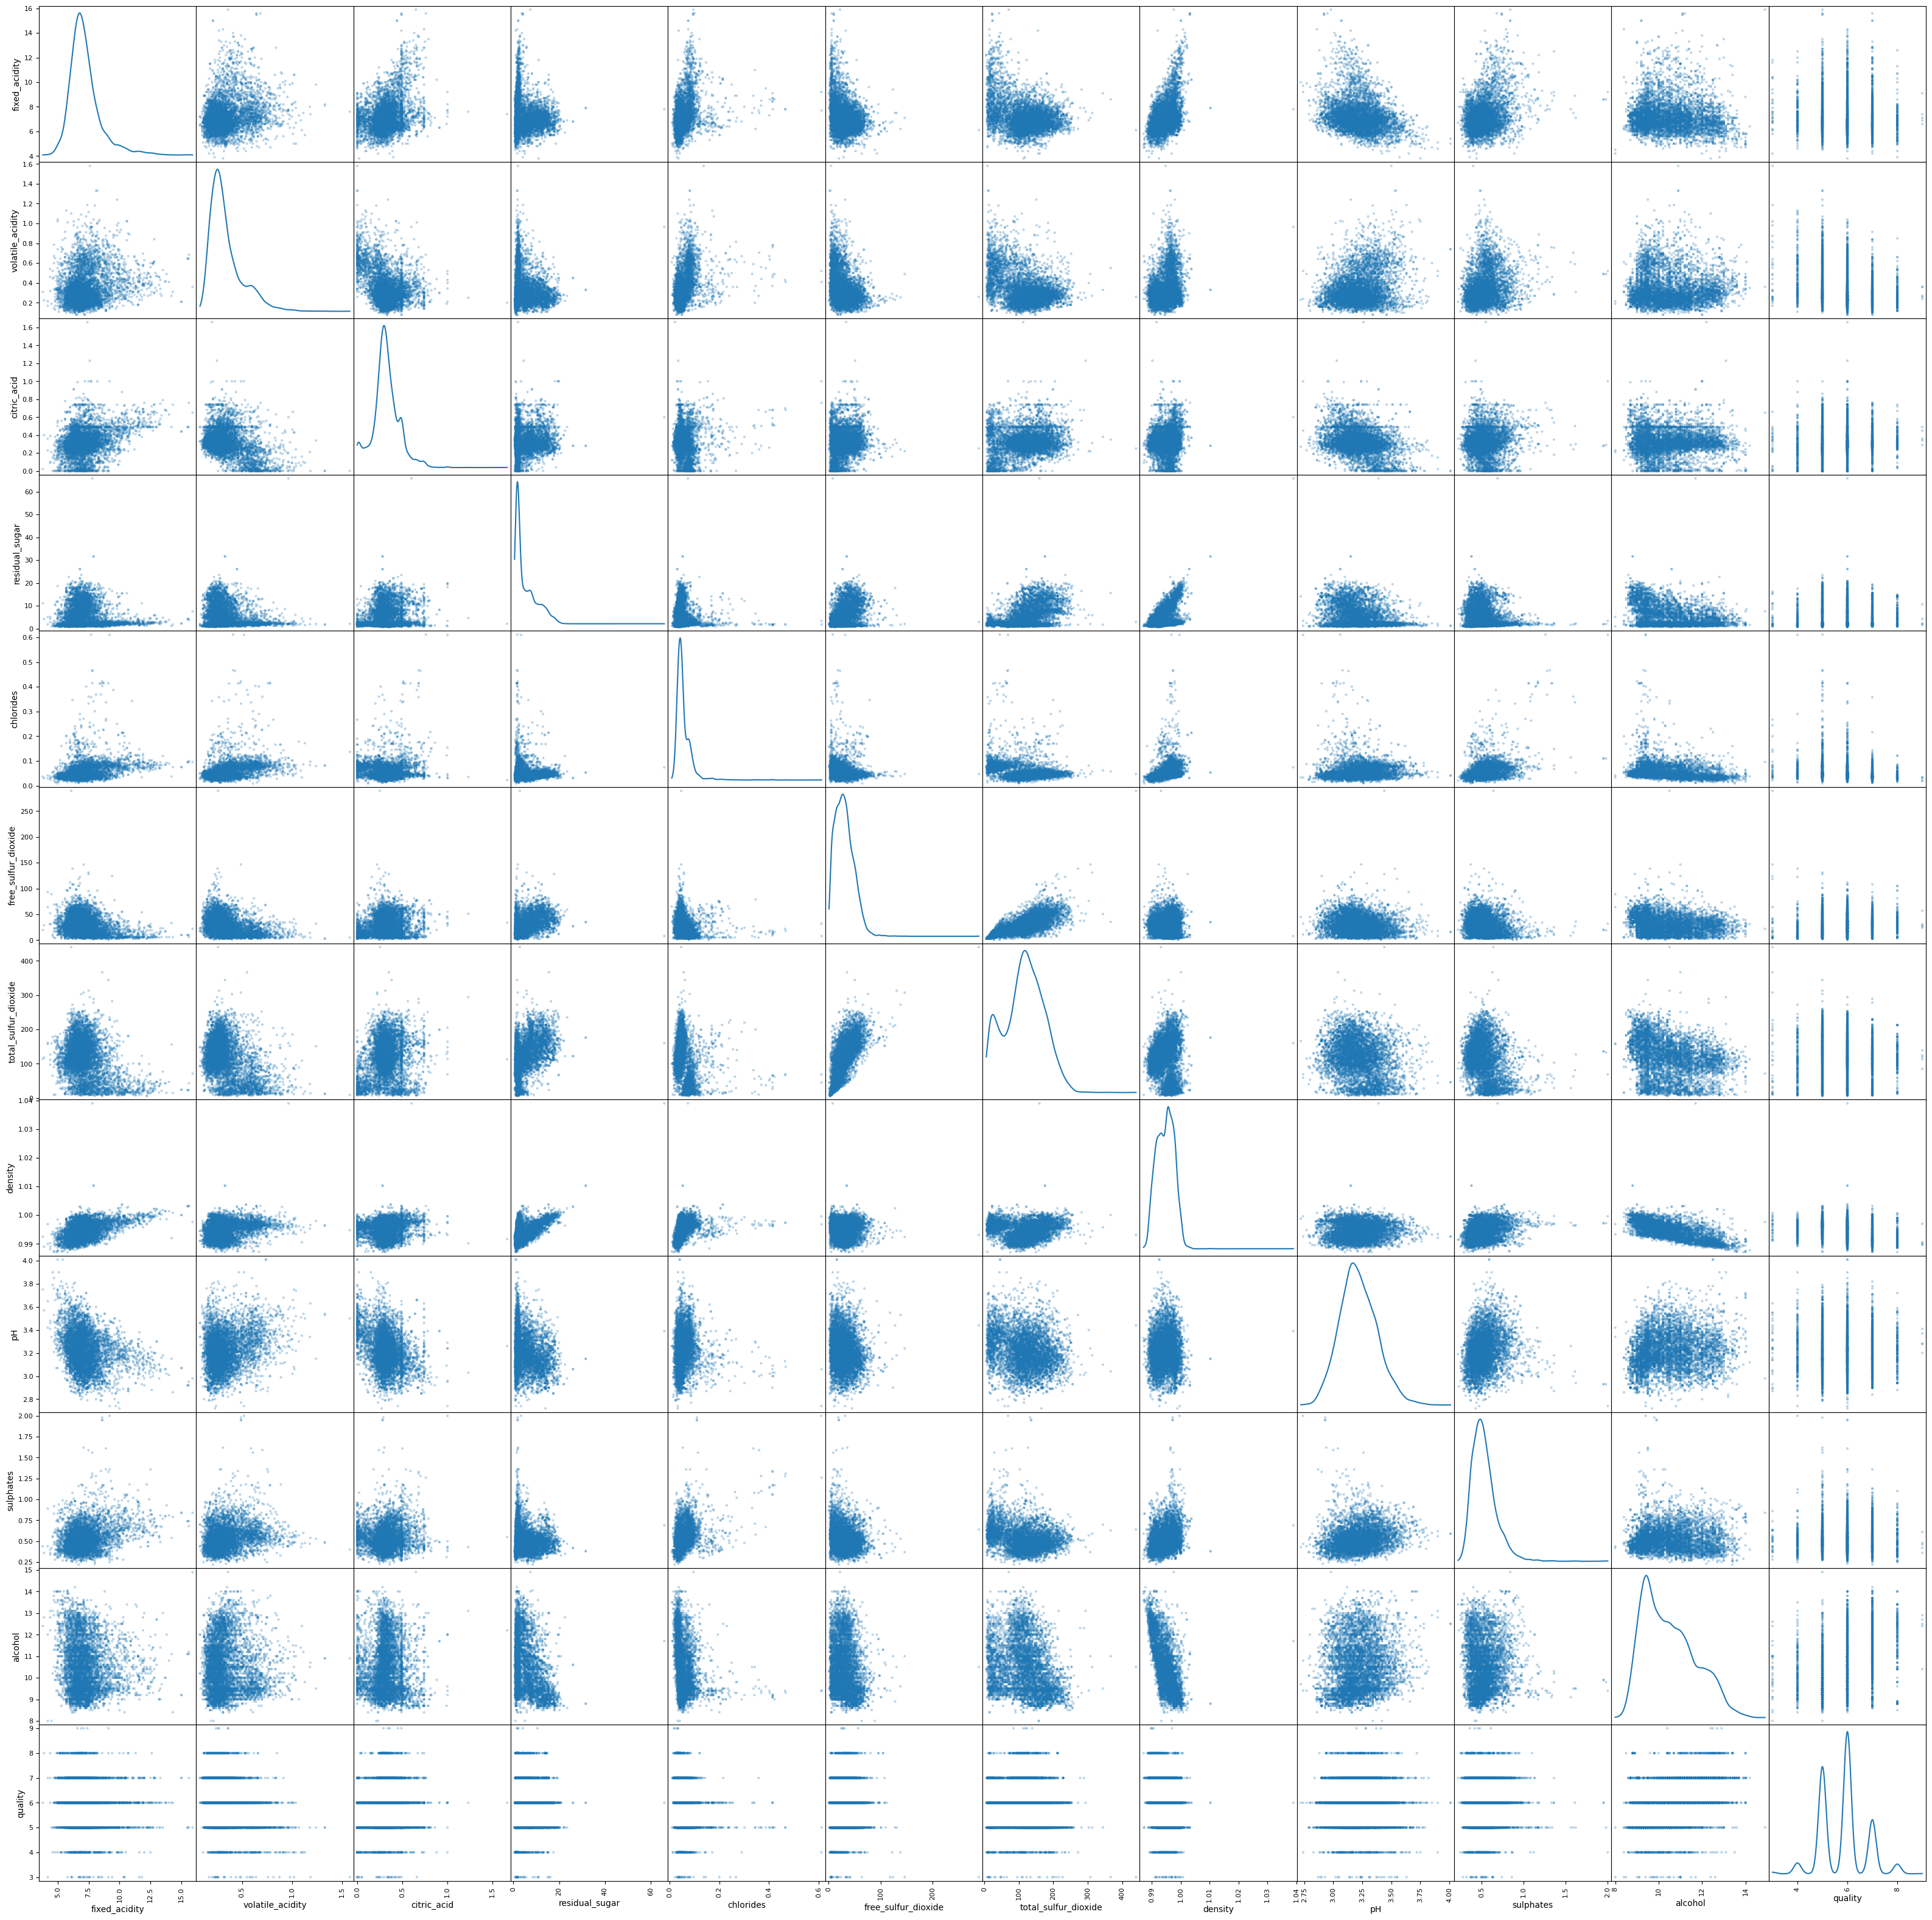

In [6]:
pd.plotting.scatter_matrix(data, alpha = 0.3, figsize = (40,40), diagonal = 'kde');

With this data, we can create a heatmap to correlate the different data components

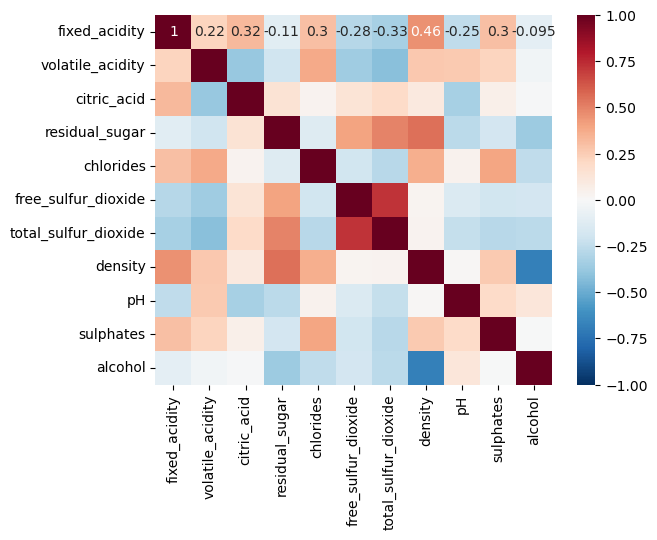

In [7]:
corr = X.corr()
heatmap = sns.heatmap(corr, annot=True, linewidths=0, vmin=-1, cmap="RdBu_r")

The data shows strong correlation along the bottom left to top right, and it dies out but stays slightly correlated as you go to the top left, but there's less correlation as you go to the bottom right

# Explore Co-relationships

## pH vs Fixed Acidity

/opt/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:1880: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(self.x, **orient_kw_x, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:1886: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
s

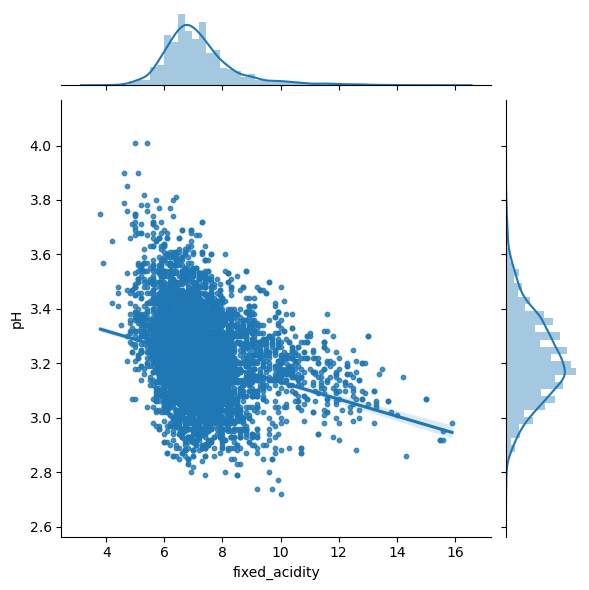

In [8]:
#Create a new dataframe containing only pH and fixed acidity columns to visualize their co-relations
fixedAcidity_pH = X[['pH', 'fixed_acidity']]

#Initialize a joint-grid with the dataframe, using seaborn library
gridA = sns.JointGrid(x="fixed_acidity", y="pH", data=fixedAcidity_pH)

#Draws a regression plot in the grid 
gridA = gridA.plot_joint(sns.regplot, scatter_kws={"s": 10})

#Draws a distribution plot in the same grid
gridA = gridA.plot_marginals(sns.distplot)

/opt/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:1880: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(self.x, **orient_kw_x, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:1886: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
s

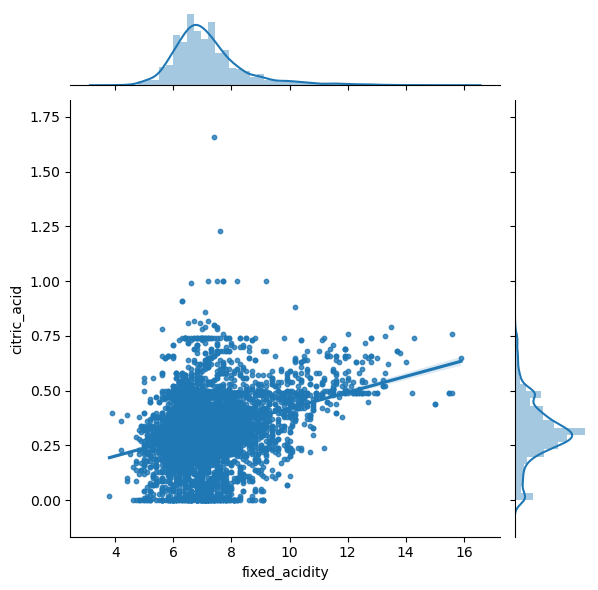

In [9]:
fixedAcidity_citricAcid = X[['citric_acid', 'fixed_acidity']]
g = sns.JointGrid(x="fixed_acidity", y="citric_acid", data=fixedAcidity_citricAcid)
g = g.plot_joint(sns.regplot, scatter_kws={"s": 10})
g = g.plot_marginals(sns.distplot)

## Volatile acidity vs Quality

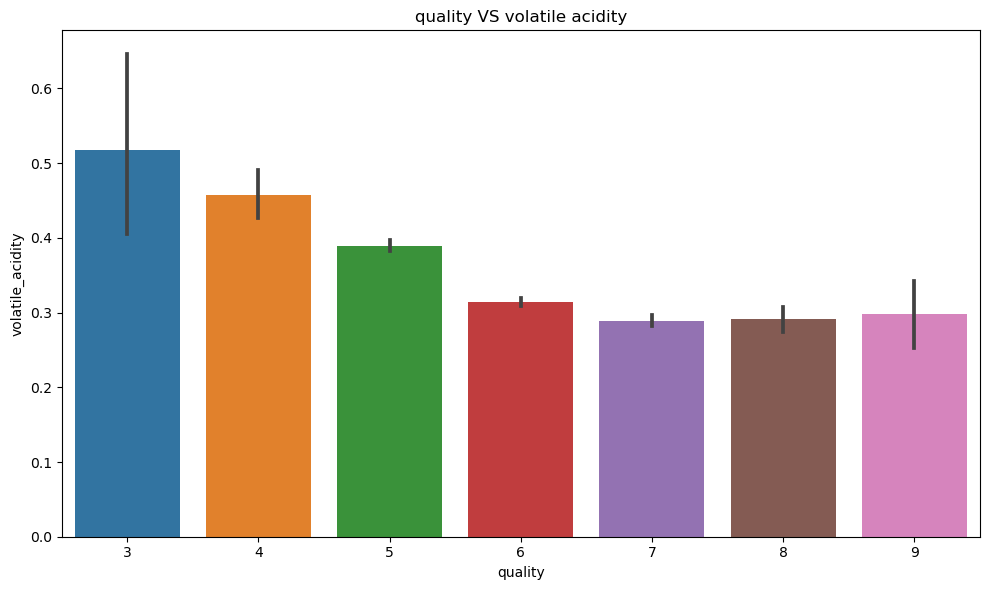

<Figure size 640x480 with 0 Axes>

In [10]:
fig, axs = plt.subplots(ncols=1,figsize=(10,6))
volatileAcidity_quality = data[['volatile_acidity', 'quality']]
sns.barplot(x='quality', y='volatile_acidity', data=volatileAcidity_quality, ax=axs)
plt.title('quality VS volatile acidity')

plt.tight_layout()
plt.show()
plt.gcf().clear()

## Alcohol vs Quality

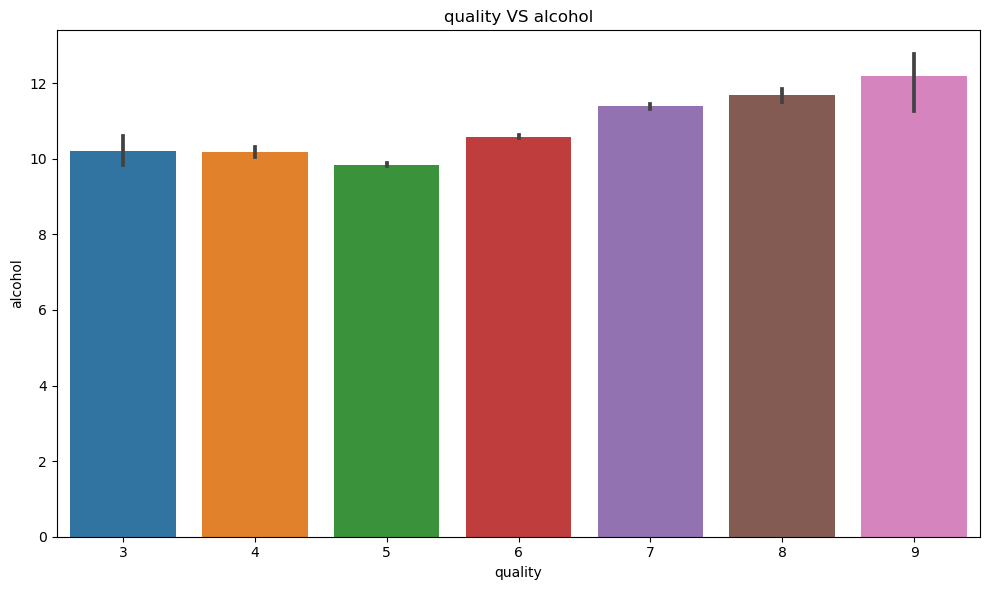

<Figure size 640x480 with 0 Axes>

In [11]:
fig, axs = plt.subplots(ncols=1,figsize=(10,6))
quality_alcohol = data[['quality', 'alcohol']]
sns.barplot(x='quality', y='alcohol', data=quality_alcohol, ax=axs)
plt.title('quality VS alcohol')

plt.tight_layout()
plt.show()
plt.gcf().clear()

In [12]:
# For each feature find the data points with extreme high or low values
for feature in data.keys():
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(data[feature], q=25)

    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(data[feature], q=75)

    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    interquartile_range = Q3 - Q1
    step = 1.5 * interquartile_range

    # Display the outliers
    print("Data points considered outliers for the feature '{}':".format(feature))
    display(data[~((data[feature] >= Q1 - step) & (data[feature] <= Q3 + step))])

    # OPTIONAL: Select the indices for data points you wish to remove
    outliers = []
    # Remove the outliers, if any were specified
    good_data = data.drop(data.index[outliers]).reset_index(drop = True)

Data points considered outliers for the feature 'fixed_acidity':


fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
3              11.2             0.280         0.56             1.9      0.075   
56             10.2             0.420         0.57             3.4      0.070   
74              9.7             0.320         0.54             2.5      0.094   
113            10.1             0.310         0.44             2.3      0.080   
197            11.5             0.300         0.60             2.0      0.067   
...             ...               ...          ...             ...        ...   
5858            3.8             0.310         0.02            11.1      0.036   
6045            4.4             0.460         0.10             2.8      0.024   
6385            4.4             0.320         0.39             4.3      0.030   
6386            3.9             0.225         0.40             4.2      0.030   
6446            4.4             0.540         0.09             5.1      0.038   

      free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
3                    17.0                  60.0  0.99800  3.16       0.58   
56                    4.0                  10.0  0.99710  3.04       0.63   
74                   28.0                  83.0  0.99840  3.28       0.82   
113                  22.0                  46.0  0.99880  3.32       0.67   
197                  12.0                  27.0  0.99810  3.11       0.97   
...                   ...                   ...      ...   ...        ...   
5858                 20.0                 114.0  0.99248  3.75       0.44   
6045                 31.0                 111.0  0.98816  3.48       0.34   
6385                 31.0                 127.0  0.98904  3.46       0.36   
6386                 29.0                 118.0  0.98900  3.57       0.36   
6446                 52.0                  97.0  0.99022  3.41       0.40   

      alcohol  quality  color  
3         9.8        6    red  
56        9.6        5    red  
74        9.6        5    red  
113       9.7        6    red  
197      10.1        6    red  
...       ...      ...    ...  
5858     12.4        6  white  
6045     13.1        6  white  
6385     12.8        8  white  
6386     12.8        8  white  
6446     12.2        7  white  

[357 rows x 13 columns]

Data points considered outliers for the feature 'volatile_acidity':


fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
4               7.4             0.700         0.00             1.9      0.076   
5               7.4             0.660         0.00             1.8      0.075   
...             ...               ...          ...             ...        ...   
6249            5.6             0.695         0.06             6.8      0.042   
6300            6.4             0.690         0.09             7.6      0.044   
6301            6.4             0.690         0.09             7.6      0.044   
6391            4.7             0.785         0.00             3.4      0.036   
6414            6.2             0.760         0.01             3.2      0.041   

      free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
4                    11.0                  34.0  0.99780  3.51       0.56   
5                    13.0                  40.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
6249                  9.0                  84.0  0.99432  3.44       0.44   
6300                 34.0                 144.0  0.99480  3.26       0.38   
6301                 34.0                 144.0  0.99480  3.26       0.38   
6391                 23.0                 134.0  0.98981  3.53       0.92   
6414                 18.0                 120.0  0.99026  3.20       0.94   

      alcohol  quality  color  
0         9.4        5    red  
1         9.8        5    red  
2         9.8        5    red  
4         9.4        5    red  
5         9.4        5    red  
...       ...      ...    ...  
6249     10.2        5  white  
6300     10.1        6  white  
6301     10.1        6  white  
6391     13.8        6  white  
6414     13.7        7  white  

[377 rows x 13 columns]

Data points considered outliers for the feature 'citric_acid':


fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
4               7.4             0.700         0.00             1.9      0.076   
5               7.4             0.660         0.00             1.8      0.075   
7               7.3             0.650         0.00             1.2      0.065   
...             ...               ...          ...             ...        ...   
6391            4.7             0.785         0.00             3.4      0.036   
6407            7.3             0.350         0.67             8.3      0.053   
6414            6.2             0.760         0.01             3.2      0.041   
6476            5.9             0.540         0.00             0.8      0.032   
6477            6.2             0.530         0.02             0.9      0.035   

      free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
4                    11.0                  34.0  0.99780  3.51       0.56   
5                    13.0                  40.0  0.99780  3.51       0.56   
7                    15.0                  21.0  0.99460  3.39       0.47   
...                   ...                   ...      ...   ...        ...   
6391                 23.0                 134.0  0.98981  3.53       0.92   
6407                 10.0                 100.0  0.99590  3.19       0.50   
6414                 18.0                 120.0  0.99026  3.20       0.94   
6476                 12.0                  82.0  0.99286  3.25       0.36   
6477                  6.0                  81.0  0.99234  3.24       0.35   

      alcohol  quality  color  
0         9.4        5    red  
1         9.8        5    red  
4         9.4        5    red  
5         9.4        5    red  
7        10.0        7    red  
...       ...      ...    ...  
6391     13.8        6  white  
6407     10.9        5  white  
6414     13.7        7  white  
6476      8.8        5  white  
6477      9.5        4  white  

[509 rows x 13 columns]

Data points considered outliers for the feature 'residual_sugar':


fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
1599            7.0             0.270         0.36           20.70      0.045   
1606            7.0             0.270         0.36           20.70      0.045   
1613            8.3             0.420         0.62           19.25      0.040   
1637            7.3             0.240         0.39           17.95      0.057   
1638            7.3             0.240         0.39           17.95      0.057   
...             ...               ...          ...             ...        ...   
6290            6.9             0.190         0.31           19.25      0.043   
6293            6.9             0.190         0.31           19.25      0.043   
6347            6.1             0.340         0.24           18.35      0.050   
6348            6.2             0.350         0.25           18.40      0.051   
6377            5.8             0.315         0.19           19.40      0.031   

      free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
1599                 45.0                 170.0  1.00100  3.00       0.45   
1606                 45.0                 170.0  1.00100  3.00       0.45   
1613                 41.0                 172.0  1.00020  2.98       0.67   
1637                 45.0                 149.0  0.99990  3.21       0.36   
1638                 45.0                 149.0  0.99990  3.21       0.36   
...                   ...                   ...      ...   ...        ...   
6290                 38.0                 167.0  0.99954  2.93       0.52   
6293                 38.0                 167.0  0.99954  2.93       0.52   
6347                 33.0                 184.0  0.99943  3.12       0.61   
6348                 28.0                 182.0  0.99946  3.13       0.62   
6377                 28.0                 106.0  0.99704  2.97       0.40   

      alcohol  quality  color  
1599     8.80        6  white  
1606     8.80        6  white  
1613     9.70        5  white  
1637     8.60        5  white  
1638     8.60        5  white  
...       ...      ...    ...  
6290     9.10        7  white  
6293     9.10        7  white  
6347     9.30        5  white  
6348     9.30        6  white  
6377    10.55        6  white  

[118 rows x 13 columns]

Data points considered outliers for the feature 'chlorides':


fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
13              7.8              0.61         0.29             1.6      0.114   
14              8.9              0.62         0.18             3.8      0.176   
15              8.9              0.62         0.19             3.9      0.170   
17              8.1              0.56         0.28             1.7      0.368   
19              7.9              0.32         0.51             1.8      0.341   
...             ...               ...          ...             ...        ...   
6392            6.0              0.31         0.32             7.4      0.175   
6393            6.0              0.32         0.30             7.3      0.174   
6412            5.8              0.36         0.50             1.0      0.127   
6419            5.8              0.36         0.50             1.0      0.127   
6444            6.6              0.38         0.29             2.4      0.136   

      free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
13                    9.0                  29.0  0.99740  3.26       1.56   
14                   52.0                 145.0  0.99860  3.16       0.88   
15                   51.0                 148.0  0.99860  3.17       0.93   
17                   16.0                  56.0  0.99680  3.11       1.28   
19                   17.0                  56.0  0.99690  3.04       1.08   
...                   ...                   ...      ...   ...        ...   
6392                 47.0                 159.0  0.99520  3.19       0.50   
6393                 46.0                 159.0  0.99519  3.18       0.49   
6412                 63.0                 178.0  0.99212  3.10       0.45   
6419                 63.0                 178.0  0.99212  3.10       0.45   
6444                 15.0                  93.0  0.99336  3.18       0.60   

      alcohol  quality  color  
13        9.1        5    red  
14        9.2        5    red  
15        9.2        5    red  
17        9.3        5    red  
19        9.2        6    red  
...       ...      ...    ...  
6392      9.4        6  white  
6393      9.4        5  white  
6412      9.7        5  white  
6419      9.7        5  white  
6444      9.5        5  white  

[286 rows x 13 columns]

Data points considered outliers for the feature 'free_sulfur_dioxide':


fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
1666            6.7              0.25         0.13             1.2      0.041   
1896            7.2              0.19         0.46             3.8      0.041   
1924            7.5              0.27         0.31             5.8      0.057   
1986            6.3              0.39         0.35             5.9      0.040   
1994            6.8              0.27         0.12             1.3      0.040   
...             ...               ...          ...             ...        ...   
5778            6.9              0.24         0.40            15.4      0.052   
5784            6.9              0.24         0.40            15.4      0.052   
6122            6.7              0.18         0.25            14.3      0.048   
6344            6.1              0.26         0.25             2.9      0.047   
6440            5.7              0.22         0.25             1.1      0.050   

      free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
1666                 81.0                 174.0  0.99200  3.14       0.42   
1896                 82.0                 187.0  0.99320  3.19       0.60   
1924                131.0                 313.0  0.99460  3.18       0.59   
1986                 82.5                 260.0  0.99410  3.12       0.66   
1994                 87.0                 168.0  0.99200  3.18       0.41   
...                   ...                   ...      ...   ...        ...   
5778                 81.0                 198.0  0.99860  3.20       0.69   
5784                 81.0                 198.0  0.99860  3.20       0.69   
6122                 79.0                 149.0  0.99750  3.12       0.37   
6344                289.0                 440.0  0.99314  3.44       0.64   
6440                 97.0                 175.0  0.99099  3.44       0.62   

      alcohol  quality  color  
1666      9.8        5  white  
1896     11.2        7  white  
1924     10.5        5  white  
1986     10.1        5  white  
1994     10.0        5  white  
...       ...      ...    ...  
5778      9.4        5  white  
5784      9.4        5  white  
6122      9.7        5  white  
6344     10.5        3  white  
6440     11.1        6  white  

[62 rows x 13 columns]

Data points considered outliers for the feature 'total_sulfur_dioxide':


fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
1079            7.9              0.30         0.68            8.30      0.050   
1081            7.9              0.30         0.68            8.30      0.050   
1924            7.5              0.27         0.31            5.80      0.057   
3016            8.6              0.55         0.35           15.55      0.057   
3530            7.1              0.49         0.22            2.00      0.047   
3726            9.1              0.33         0.38            1.70      0.062   
3977            9.4              0.23         0.56           16.45      0.063   
4253            6.9              0.40         0.22            5.95      0.081   
4751            7.6              0.25         1.23            4.60      0.035   
6344            6.1              0.26         0.25            2.90      0.047   

      free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
1079                 37.5                 278.0  0.99316  3.01       0.51   
1081                 37.5                 289.0  0.99316  3.01       0.51   
1924                131.0                 313.0  0.99460  3.18       0.59   
3016                 35.5                 366.5  1.00010  3.04       0.63   
3530                146.5                 307.5  0.99240  3.24       0.37   
3726                 50.5                 344.0  0.99580  3.10       0.70   
3977                 52.5                 282.0  1.00098  3.10       0.51   
4253                 76.0                 303.0  0.99705  3.40       0.57   
4751                 51.0                 294.0  0.99018  3.03       0.43   
6344                289.0                 440.0  0.99314  3.44       0.64   

      alcohol  quality  color  
1079     12.3        7    red  
1081     12.3        7    red  
1924     10.5        5  white  
3016     11.0        3  white  
3530     11.0        3  white  
3726      9.5        5  white  
3977      9.3        5  white  
4253      9.4        5  white  
4751     13.1        6  white  
6344     10.5        3  white

Data points considered outliers for the feature 'density':


fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
3252            7.9             0.330         0.28            31.6      0.053   
3262            7.9             0.330         0.28            31.6      0.053   
4380            7.8             0.965         0.60            65.8      0.074   

      free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
3252                 35.0                 176.0  1.01030  3.15       0.38   
3262                 35.0                 176.0  1.01030  3.15       0.38   
4380                  8.0                 160.0  1.03898  3.39       0.69   

      alcohol  quality  color  
3252      8.8        6  white  
3262      8.8        6  white  
4380     11.7        6  white

Data points considered outliers for the feature 'pH':


fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
45              4.6             0.520         0.15             2.1      0.054   
94              5.0             1.020         0.04             1.4      0.045   
95              4.7             0.600         0.17             2.3      0.058   
142             5.2             0.340         0.00             1.8      0.050   
144             5.2             0.340         0.00             1.8      0.050   
...             ...               ...          ...             ...        ...   
5858            3.8             0.310         0.02            11.1      0.036   
6069            4.7             0.145         0.29             1.0      0.042   
6164            5.8             0.280         0.66             9.1      0.039   
6166            5.8             0.280         0.66             9.1      0.039   
6343            5.0             0.240         0.19             5.0      0.043   

      free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
45                    8.0                  65.0  0.99340  3.90       0.56   
94                   41.0                  85.0  0.99380  3.75       0.48   
95                   17.0                 106.0  0.99320  3.85       0.60   
142                  27.0                  63.0  0.99160  3.68       0.79   
144                  27.0                  63.0  0.99160  3.68       0.79   
...                   ...                   ...      ...   ...        ...   
5858                 20.0                 114.0  0.99248  3.75       0.44   
6069                 35.0                  90.0  0.99080  3.76       0.49   
6164                 26.0                 159.0  0.99650  3.66       0.55   
6166                 26.0                 159.0  0.99650  3.66       0.55   
6343                 17.0                 101.0  0.99438  3.67       0.57   

      alcohol  quality  color  
45       13.1        4    red  
94       10.5        4    red  
95       12.9        6    red  
142      14.0        6    red  
144      14.0        6    red  
...       ...      ...    ...  
5858     12.4        6  white  
6069     11.3        6  white  
6164     10.8        5  white  
6166     10.8        5  white  
6343     10.0        5  white  

[73 rows x 13 columns]

Data points considered outliers for the feature 'sulphates':


fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
13              7.8             0.610         0.29             1.6      0.114   
14              8.9             0.620         0.18             3.8      0.176   
15              8.9             0.620         0.19             3.9      0.170   
17              8.1             0.560         0.28             1.7      0.368   
19              7.9             0.320         0.51             1.8      0.341   
...             ...               ...          ...             ...        ...   
6295            6.1             0.150         0.40             1.2      0.030   
6391            4.7             0.785         0.00             3.4      0.036   
6414            6.2             0.760         0.01             3.2      0.041   
6417            6.0             0.270         0.40             1.7      0.021   
6485            6.2             0.210         0.28             5.7      0.028   

      free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
13                    9.0                  29.0  0.99740  3.26       1.56   
14                   52.0                 145.0  0.99860  3.16       0.88   
15                   51.0                 148.0  0.99860  3.17       0.93   
17                   16.0                  56.0  0.99680  3.11       1.28   
19                   17.0                  56.0  0.99690  3.04       1.08   
...                   ...                   ...      ...   ...        ...   
6295                 19.0                  84.0  0.98926  3.19       0.96   
6391                 23.0                 134.0  0.98981  3.53       0.92   
6414                 18.0                 120.0  0.99026  3.20       0.94   
6417                 18.0                  82.0  0.98910  3.24       0.95   
6485                 45.0                 121.0  0.99168  3.21       1.08   

        alcohol  quality  color  
13     9.100000        5    red  
14     9.200000        5    red  
15     9.200000        5    red  
17     9.300000        5    red  
19     9.200000        6    red  
...         ...      ...    ...  
6295  13.000000        6  white  
6391  13.800000        6  white  
6414  13.700000        7  white  
6417  13.133333        6  white  
6485  12.150000        7  white  

[191 rows x 13 columns]

Data points considered outliers for the feature 'alcohol':


fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
652            15.9              0.36         0.65             7.5      0.096   
5517            6.4              0.35         0.28             1.6      0.037   
6102            5.8              0.61         0.01             8.4      0.041   

      free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
652                  22.0                  71.0  0.99760  2.98       0.84   
5517                 31.0                 113.0  0.98779  3.12       0.40   
6102                 31.0                 104.0  0.99090  3.26       0.72   

      alcohol  quality  color  
652     14.90        5    red  
5517    14.20        7  white  
6102    14.05        7  white

Data points considered outliers for the feature 'quality':


fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
267             7.9             0.350         0.46             3.6      0.078   
278            10.3             0.320         0.45             6.4      0.073   
390             5.6             0.850         0.05             1.4      0.045   
440            12.6             0.310         0.72             2.2      0.072   
455            11.3             0.620         0.67             5.2      0.086   
...             ...               ...          ...             ...        ...   
6364            5.2             0.300         0.34             1.5      0.038   
6365            6.4             0.320         0.25             5.0      0.055   
6385            4.4             0.320         0.39             4.3      0.030   
6386            3.9             0.225         0.40             4.2      0.030   
6401            5.8             0.280         0.34             2.2      0.037   

      free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
267                  15.0                  37.0  0.99730  3.35       0.86   
278                   5.0                  13.0  0.99760  3.23       0.82   
390                  12.0                  88.0  0.99240  3.56       0.82   
440                   6.0                  29.0  0.99870  2.88       0.82   
455                   6.0                  19.0  0.99880  3.22       0.69   
...                   ...                   ...      ...   ...        ...   
6364                 18.0                  96.0  0.98942  3.56       0.48   
6365                 28.0                 138.0  0.99171  3.27       0.50   
6385                 31.0                 127.0  0.98904  3.46       0.36   
6386                 29.0                 118.0  0.98900  3.57       0.36   
6401                 24.0                 125.0  0.98986  3.36       0.33   

      alcohol  quality  color  
267      12.8        8    red  
278      12.6        8    red  
390      12.9        8    red  
440       9.8        8    red  
455      13.4        8    red  
...       ...      ...    ...  
6364     13.0        8  white  
6365     12.4        8  white  
6385     12.8        8  white  
6386     12.8        8  white  
6401     12.8        8  white  

[228 rows x 13 columns]

UFuncTypeError: ufunc 'subtract' did not contain a loop with signature matching types (dtype('<U5'), dtype('<U5')) -> None